# Matching mad and rms threshold-crossing

**Method**
- find the MAD threshold for multiunit threshold-crossing that matches the - 3.5 x RMS threshold used by Trautmann et al, 2019, NEURON 
- we use the first 10 min of recording (entire recording is too memory intensive for my machine)
- high-pass filtering and common referencing only, as in Trautmann et al, 2019, NEURON .

## Setup 

activate pca_manifold

In [3]:
# SETUP PACKAGES 
%load_ext autoreload
%autoreload 2
import os
import numpy as np
import spikeinterface as si
import spikeinterface.preprocessing as spre
from matplotlib import pyplot as plt;
# set project path
proj_path = "/home/steeve/steeve/epfl/code/spikebias"
os.chdir(proj_path)

# DATASET PATHS
RECORDING_PATH = "/home/steeve/steeve/epfl/code/spikebias/dataset/00_raw/recording_npx_evoked"

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Functions

In [4]:
def mad(voltage_trace):
    return np.mean(np.absolute(voltage_trace - np.mean(voltage_trace)))

def rms(voltage_trace, ):
    return np.sqrt(np.mean((voltage_trace)**2))

In [ ]:
%%time 

# load and preprocess
Recording = si.load_extractor(RECORDING_PATH)
Recording = Recording.frame_slice(start_frame=0, end_frame=2400)             # for 40 min
Recording = spre.highpass_filter(Recording, freq_min=300)
Recording = spre.common_reference(Recording, reference="global", operator="median")

CPU times: user 5.25 ms, sys: 572 µs, total: 5.83 ms
Wall time: 5.51 ms


In [ ]:
%%time

# get MAD and RMS for each site in cortex
sites_in_ctx = Recording.get_channel_ids()[Recording.get_property('layers')!='Outside']
trace_mad = []
trace_rms = []
for ix in sites_in_ctx:
    trace = Recording.get_traces(channel_ids=[ix])
    trace_mad.append(mad(trace))
    trace_rms.append(rms(trace))
trace_mad = np.array(trace_mad)
trace_rms = np.array(trace_rms)

CPU times: user 3.32 s, sys: 507 ms, total: 3.83 s
Wall time: 4.18 s


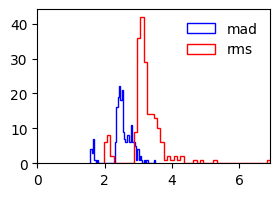

In [29]:
# setup plot 
fig, ax = plt.subplots(1,1,figsize=(3,2))

# plot mad
ax.hist(trace_mad, bins=50, color='b', histtype='step', label='mad')

# plot rms
ax.hist(trace_rms, bins=50, color='red', histtype='step', label='rms')
ax.set_xlim([0, np.max([trace_rms.max(), trace_mad.max()])])
plt.legend(frameon=False);

In [ ]:
print("mean MAD:", trace_mad.mean())
print("mean RMS:", trace_rms.mean())

# calculate voltage threshold for MAD that matches the RMS threshold
matching_ratio =  trace_rms.mean() / trace_mad.mean()
print("matching thresh for mad (=3.5 x rms / mad):", 3.5 * trace_rms.mean() / trace_mad.mean())

mean MAD: 2.517739
mean RMS: 3.2073443
matching thresh for mad (=3.5 x rms / mad): 4.458645145912994
